In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [71]:
df=pd.read_csv('twitter_validation.csv',header=None,encoding='ISO-8859-1')
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [72]:
df.columns=['id','media','target','text']
df

,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [73]:
df.head()

,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [74]:
df.shape

(1000, 4)

In [75]:
df.tail()

,id,media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [76]:
df.dtypes

id         int64
media     object
target    object
text      object
dtype: object

In [77]:
df.isna().sum()

id        0
media     0
target    0
text      0
dtype: int64

In [78]:
df['target'].unique

<bound method Series.unique of 0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: target, Length: 1000, dtype: object>

In [79]:
tt = df['target'].value_counts()

<Axes: xlabel='count', ylabel='target'>

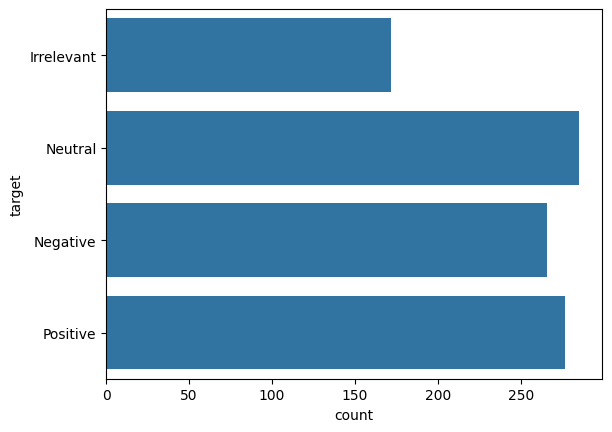

In [80]:
sns.countplot(data=df['target'])

<BarContainer object of 4 artists>

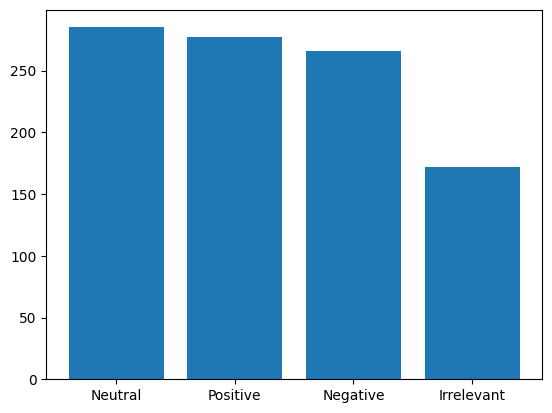

In [81]:
plt.bar(tt.index,tt.values)

In [82]:
df['media'].value_counts()

media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
PlayerUnknownsBattlegrounds(PUBG)    38
FIFA                                 38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Facebook                             33
Verizon                              32
Hearthstone                          32
Overwatch                            32
CS-GO                                32
CallOfDuty                           31
WorldOfCraft                         30
Cyberpunk2077                        30
MaddenNFL                            29
Microsoft                            28
Dota2                             

In [83]:
df.drop(['id'],axis=1,inplace=True)
df.drop(['media'],axis=1,inplace=True)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so itâs time to drink wine n pl...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [84]:
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so itâs time to drink wine n pl...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [85]:
df.reset_index(drop=True,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [86]:
df['target'] = df['target'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [87]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [89]:
#tokenisation
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [90]:
#remove special characterts
tweets=tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [91]:
#collecting words with length 3 or more
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [92]:
#stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:" ".join(x))
tweets


0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [94]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object